In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

C:\Users\82109\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
train_imgs = np.load('./comp0090/fashion-train-imgs.npz')     # 28, 28, 120000
train_label = np.load('./comp0090/fashion-train-labels.npz')   # 12000, 
dev_imgs = np.load('./comp0090/fashion-dev-imgs.npz')          # 28, 28, 1000
dev_label = np.load('./comp0090/fashion-dev-labels.npz')       # 1000,
test_imgs = np.load('./comp0090/fashion-test-imgs.npz')        # 28, 28, 1000
test_label = np.load('./comp0090/fashion-test-labels.npz')     # 1000, 

print(train_imgs.shape)
print(train_label.shape)
print(dev_imgs.shape)
print(dev_label.shape)
print(test_imgs.shape)
print(test_label.shape)

(28, 28, 12000)
(12000,)
(28, 28, 1000)
(1000,)
(28, 28, 1000)
(1000,)


[ 2592 11132  1286  1673 11665  6957  1448  6625  8858  7173  6162  9349
  5965  7185  1989  3258  3642  3614  3932 10675  7867   675  6510  3046
 11861]
(25, 784)


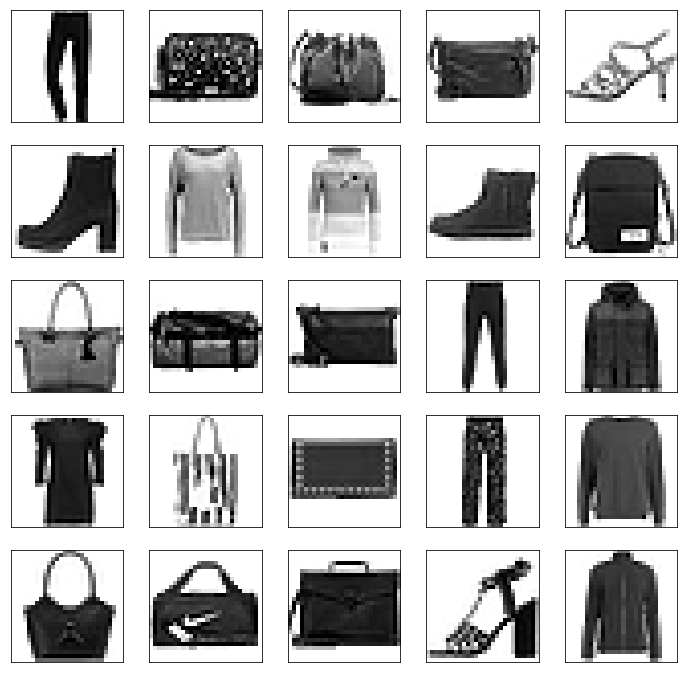

In [3]:
train_imgs_data = np.zeros((train_imgs.shape[2],train_imgs.shape[1]*train_imgs.shape[0]))
for k in range(train_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     train_imgs_data[k][index] = train_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(train_imgs_data.shape[0]), 25)
sample_images = train_imgs_data[sample_idx, :]
print(sample_idx)
print(sample_images.shape)
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

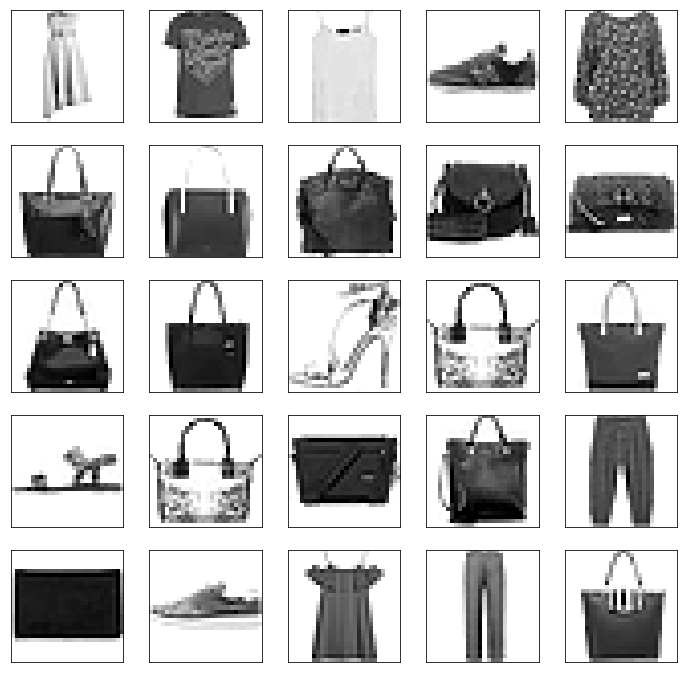

In [4]:
dev_imgs_data = np.zeros((dev_imgs.shape[2],dev_imgs.shape[1]*dev_imgs.shape[0]))
for k in range(dev_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     dev_imgs_data[k][index] = dev_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(dev_imgs_data.shape[0]), 25)
sample_images = dev_imgs_data[sample_idx, :]
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

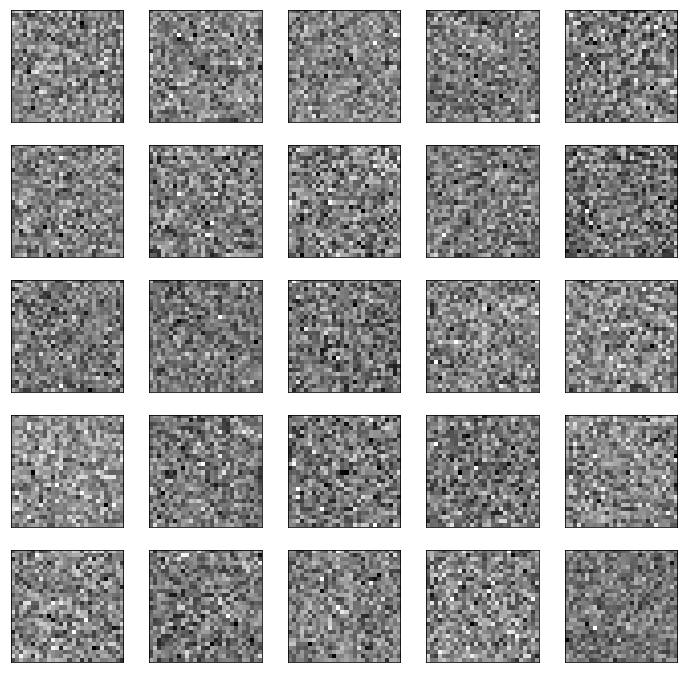

In [5]:
test_imgs_data = np.zeros((test_imgs.shape[2],test_imgs.shape[1]*test_imgs.shape[0]))
for k in range(test_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     test_imgs_data[k][index] = test_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(test_imgs_data.shape[0]), 25)
sample_images = test_imgs_data[sample_idx, :]
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

In [6]:
# Derive the analytical gradients for the model parameters given the square loss
# Provide code verifying that your analytical gradients are correct using finite difference for 
# two or more samples from the training data.
def sigmoid(z): #activation function
    preds = 1 / (1 + np.exp(-z))
    return preds

def Loss2(preds,y):
  inner = np.power((y-preds),2)
  loss = np.sum(inner) / (np.size(y))/2
  return loss

def gradient(X, y, preds):
    h = preds
    grad = np.zeros(X.shape[1])
    for i in range(X.shape[0]):
        a = ((y[i] - h[i]) * (1 - h[i]))
        b = a * h[i]
        c = X[i,:] * b
        grad = grad + c
        
    grad = -grad / X.shape[0]
    return grad

In [12]:
def loss_function(W,X,y):
    prediction = sigmoid(np.dot(X, W.T))
    inner = np.power((y - prediction), 2)
    loss = np.sum(inner) / (np.size(y))/2
    return loss

def finDiff_gradCheck(theta, X, y):
    e_value = 0.00005
    e = np.zeros(theta.shape)
    gradient = np.zeros(theta.shape)
    for i in range(theta.shape[0]):
        e[i] = e_value
        gradient[i] = (loss_function(theta + e, X, y) - loss_function(theta - e, X, y))/2/e_value
        e = np.zeros(theta.shape)
    return gradient

In [10]:
def LogisticRegression(X, y, lr, max_it, X_val, Y_val):
    
    checkpoint_step = int(max_it / 100) #max_it is the maximum number of iterations
    
    W = np.zeros(784)

    best_loss = float('+inf') #the maximum float number
    best_w = None
    
    history = []
    train_output = np.zeros(y.shape[0])
    val_output = np.zeros(Y_val.shape[0])
    accuracy_train_set = []
    accuracy_val_set = []

    for it in range(max_it): #iterations
        z = np.dot(X, W.T)  #prediction
        preds = sigmoid(z) #sigmoid function 
        
        loss = Loss2(preds, y) #loss function
        
        if loss < best_loss:
            best_w = W
            
        grad = gradient(X, y, preds) #gradient
        W = W - np.dot(lr, grad)
        
        #validation
        z_val = np.dot(X_val, W.T)
        preds_val = sigmoid(z_val)
        
        right_data_val = 0
        right_data_train = 0
        for i in range(Y_val.shape[0]):
          if preds_val[i] > 0.5:
            val_output[i] = 1
            if val_output[i] == Y_val[i]:
              right_data_val = right_data_val + 1
            
          else:
            val_output[i] = 0
            if val_output[i] == Y_val[i]:
              right_data_val = right_data_val + 1

        accuracy_val = right_data_val / len(Y_val)

        #train
        for i in range(y.shape[0]):
          if preds[i] > 0.5:
            train_output[i] = 1
            if train_output[i] == y[i]:
              right_data_train = right_data_train + 1
          else:
            train_output[i] = 0
            if train_output[i] == y[i]:
              right_data_train = right_data_train + 1

        accuracy_train=right_data_train/len(y)


        #record 
        history.append(loss) 
        accuracy_val_set.append(accuracy_val)
        accuracy_train_set.append(accuracy_train)

            
        if (it + 1) % checkpoint_step == 0:
            print('[{:05}] current accuracy_val: {}'.format(it + 1, accuracy_val))
        
    
    return history, best_w, accuracy_val_set, accuracy_train_set

In [11]:
step_size = 0.1
max_it = 1500
history, best_w, accuracy_val_set, accuracy_train_set = LogisticRegression(train_imgs_data, train_label, step_size, max_it, dev_imgs_data,dev_label)

[00015] current accuracy_val: 0.82
[00030] current accuracy_val: 0.865
[00045] current accuracy_val: 0.905
[00060] current accuracy_val: 0.922
[00075] current accuracy_val: 0.934
[00090] current accuracy_val: 0.941
[00105] current accuracy_val: 0.945
[00120] current accuracy_val: 0.948
[00135] current accuracy_val: 0.948
[00150] current accuracy_val: 0.95
[00165] current accuracy_val: 0.95
[00180] current accuracy_val: 0.952
[00195] current accuracy_val: 0.952
[00210] current accuracy_val: 0.952
[00225] current accuracy_val: 0.952
[00240] current accuracy_val: 0.952
[00255] current accuracy_val: 0.953
[00270] current accuracy_val: 0.953
[00285] current accuracy_val: 0.953
[00300] current accuracy_val: 0.953
[00315] current accuracy_val: 0.953
[00330] current accuracy_val: 0.954
[00345] current accuracy_val: 0.955
[00360] current accuracy_val: 0.955
[00375] current accuracy_val: 0.955
[00390] current accuracy_val: 0.954
[00405] current accuracy_val: 0.954
[00420] current accuracy_val: 0

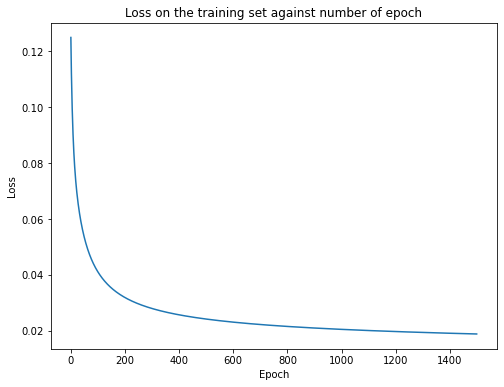

In [13]:
def plot_loss_curve(logs):
    fig = plt.figure(figsize=(8, 6))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Loss on the training set against number of epoch')
    plt.plot(logs)
    plt.show()
    
plot_loss_curve(history)

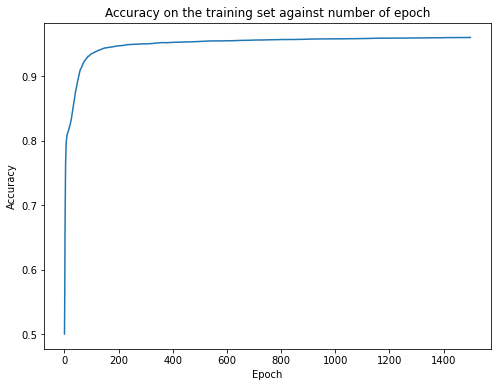

In [14]:
def plot_accuracy_train_set_curve(logs):
    fig = plt.figure(figsize=(8, 6))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy on the training set against number of epoch')
    plt.plot(logs)
    plt.show()
plot_accuracy_train_set_curve(accuracy_train_set)

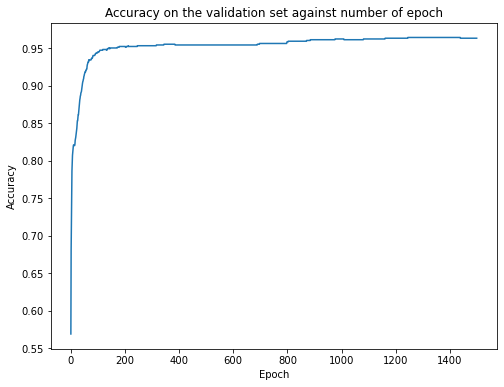

In [15]:
def plot_accuracy_val_set_curve(logs):
    fig = plt.figure(figsize=(8, 6))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy on the validation set against number of epoch')
    plt.plot(logs)
    plt.show()
plot_accuracy_val_set_curve(accuracy_val_set)

**Answer:** Gradient descent is applied to increase the performance of the model during the iterations. Because it is a full batch, the number of iteration and epoch is the same. In every epoch, weight is W = W - lr*Gradient. The learning rate is a constant number set by us, and the gradient is an array that is calculated from the Gradient function. The weight keeps changing with set direction to find the smallest loss. The current loss and best loss in previous epochs are compared. If the current loss is smaller, the current weight/theta is better than previous ones. Then the better weight is saved and used in next epoch. In order to show the performance of the training model, functions for training loss, training accuracy and validation accuracy are implemented. In each epoch, they will save the current result and fulfil the final matrices. The checkpoint is responsible for presenting the training accuracy during the training process, so it will be helpful to find whether the accuracy is decreasing and has the tendency to converge.

The figure shows that the validation accuracy converges during the 1500 epochs. To find which epoch obtains the highest validation accuracy, the training and validation accuracy is printed at the checkpoints. It is found that at the last epoch (the 1500 epoch), the validation accuracy is highest.

In the epoch, validation accuracy = 0.964, training accuracy = 0.963.